In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_infertility = pd.read_csv("PCOS_infertility.csv")

In [5]:
df_infertility.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [6]:
df_without_infertility = pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name=1)


In [7]:
df_without_infertility.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [63]:
df_without_infertility['Cycle(R/I)'].unique

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
536    2
537    2
538    2
539    4
540    4
Name: Cycle(R/I), Length: 541, dtype: int64>

Understanding the Dataset

Patient File No. : This is the report number which has data for a particular patient

PCOS : Polycystic ovary syndrome (PCOS) is a hormonal disorder common among women of reproductive age, we would like to determine whether the patient has this syndrome or not

Age (yrs) : Age of patient in years

Weight (Kg) : Weight of patient in kg

Height(Cm) : Height of patient in centimeter

BMI : Body mass index of the patient

Blood Group : Blood Group of the patient A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18 (total 8 blood groups)

Pulse rate(bpm) : It is the heart rate of patient in beats per minute. Resting heart rate for adults ranges from 60 to 100 beats per minute

RR (breaths/min) : It is the respiration rate. Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.

Hb(g/dl) : Hemoglobin levels in gram per deciliter. For women, a normal level ranges between 12.3 gm/dL and 15.3 gm/dL.
Cycle(R/I) : ....

Cycle length(days) : This represents length of menstrual cycle. The length of the menstrual cycle varies from woman to woman, but the average is to have periods every 28 days.

Marraige Status (Yrs) : Years of marriage

Pregnant(Y/N) : If the patient is pregnant

No. of aborptions : No. of aborptions, if any. There are total 541 values out of which 437 patients never had any abortions.

I beta-HCG(mIU/mL) : this is case 1 of beta hcg

II beta-HCG(mIU/mL) : this is case 2 of beta hcg (please note: An beta hCG level of less than 5 mIU/mL is considered negative for pregnancy, and anything above 25 mIU/mL is considered positive for pregnancy) (also the unit mIU/mL is mili International Units per miliLiter)

FSH(mIU/mL) : Its full form is Follicle-stimulating hormone. During puberty: it ranges from 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Women who are still menstruating: 4.7 to 21.5 mIU/mL (4.5 to 21.5 IU/L) After menopause: 25.8 to 134.8 mIU/mL (25.8 to 134.8 IU/L)

LH(mIU/mL) : It is Luteinizing Hormone.

FSH/LH : Ratio of FSH and LH

Hip(inch) : Hip size in inches

Waist(inch) : Waist Size in inches

Waist:Hip Ratio : Waist by hip ratio

TSH (mIU/L) : It is thyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L

AMH(ng/mL) : It is Anti-Mullerian Hormone.

PRL(ng/mL) : This represents Prolactin levels.

Vit D3 (ng/mL): Vitamin D levels. Normal vitamin D levels in the blood are 20 ng/ml or above for adults.

PRG(ng/mL): Progesterone levels

RBS(mg/dl): This value is obtained by doing Random Blood Sugar (RBS) Test.

Weight gain(Y/N): Is there been a weight gain

hair growth(Y/N): Is there been a hair growth

Skin darkening (Y/N): Skin darkening issues

Hair loss(Y/N): hair loss issues

Pimples(Y/N): pimples issues

Fast food (Y/N): is fast food part of you diet

Reg.Exercise(Y/N): do you do exercises on a regular basis

BP _Systolic (mmHg): Systolic blood pressure, measures the pressure in your arteries when your heart beats.

BP _Diastolic (mmHg): Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

Follicle No. (L): Follicles number in the left side

Follicle No. (R): Follicles number in the right side

Avg. F size (L) (mm): Average Follicle size in the left side in mm

Avg. F size (R) (mm): Average Follicle size in the right side in mm

Endometrium (mm): Size of Endometrium in mm

## Data Preprocessing

Steps involved in Data Preprocessing:

Merging the two files that are sorted into two based on patients with infertility and without infertility

Dropping the repeated features

Encoding categorical variables (dtype objects)

Dealing with missing values

In [8]:
df_infertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [9]:
#Converting object data type to numeric type
df_infertility["AMH(ng/mL)"] = pd.to_numeric(df_infertility["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric


In [10]:
df_infertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              540 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 25.5 KB


In [11]:
df_without_infertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [12]:
#Converting object data type to numeric type
df_without_infertility["AMH(ng/mL)"] = pd.to_numeric(df_without_infertility["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df_without_infertility["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df_without_infertility["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric

In [13]:
#dropping axes which are not useful
df_without_infertility = df_without_infertility.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis

In [14]:
#Merge the files
data = pd.merge(df_without_infertility,df_infertility, on='Sl. No', suffixes={'','_wo'},how='left')


In [15]:
data.head(8)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Patient File No._wo,PCOS (Y/N)_wo,I beta-HCG(mIU/mL)_wo,II beta-HCG(mIU/mL)_wo,AMH(ng/mL)_wo
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,3,18.0,18.0,8.5,10001,0,1.99,1.99,2.07
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,3,5,15.0,14.0,3.7,10002,0,60.80,1.99,1.53
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,13,15,18.0,20.0,10.0,10003,1,494.08,494.08,6.63
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,2,15.0,14.0,7.5,10004,0,1.99,1.99,1.22
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,3,4,16.0,14.0,7.0,10005,0,801.45,801.45,2.26
5,6,6,0,36,74.1,165.0,27.217631,15,78,28,...,9,6,16.0,20.0,8.0,10006,0,237.97,1.99,6.74
6,7,7,0,34,64.0,156.0,26.298488,11,72,18,...,6,6,15.0,16.0,6.8,10007,0,1.99,1.99,3.05
7,8,8,0,33,58.5,159.0,23.139907,13,72,20,...,7,6,15.0,18.0,7.1,10008,0,100.51,100.51,1.54


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl. No                     541 non-null    int64  
 1   Patient File No.           541 non-null    int64  
 2   PCOS (Y/N)                 541 non-null    int64  
 3    Age (yrs)                 541 non-null    int64  
 4   Weight (Kg)                541 non-null    float64
 5   Height(Cm)                 541 non-null    float64
 6   BMI                        541 non-null    float64
 7   Blood Group                541 non-null    int64  
 8   Pulse rate(bpm)            541 non-null    int64  
 9   RR (breaths/min)           541 non-null    int64  
 10  Hb(g/dl)                   541 non-null    float64
 11  Cycle(R/I)                 541 non-null    int64  
 12  Cycle length(days)         541 non-null    int64  
 13  Marraige Status (Yrs)      540 non-null    float64

In [17]:
#Drop repeated features
data =data.drop(['Sl. No',"Patient File No.", 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo',
       'II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)
#Change the title of the properties
data = data.rename(columns = {"PCOS (Y/N)":"Target"})
#Look at the merged data.
data.head() 

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Patient File No._wo
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,1.0,0,110,80,3,3,18.0,18.0,8.5,10001
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0.0,0,120,70,3,5,15.0,14.0,3.7,10002
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1.0,0,120,80,13,15,18.0,20.0,10.0,10003
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0.0,0,120,70,2,2,15.0,14.0,7.5,10004
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0.0,0,120,80,3,4,16.0,14.0,7.0,10005


### Dealing with missing values

In [18]:
data.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [19]:
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)


In [20]:
#Clearing up the extra space in the column names 

data.columns = [col.strip() for col in data.columns]

## Exploratory  Data Analysis

Steps involved in EDA

Feature selection based on the correlation factor

Patterns Of Length Of The Menstrual Cycle

Patterns Of BMI

Patterns Of Irregularity In Mensuration

Number of Follicles

Some Miscellaneous EDA

In [21]:
# Having a look at some basic statistical details.

data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Patient File No._wo
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,10271.000000
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,156.317519
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10001.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,10136.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,10271.000000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,10406.000000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000,10541.000000


In [22]:
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(526, 43)

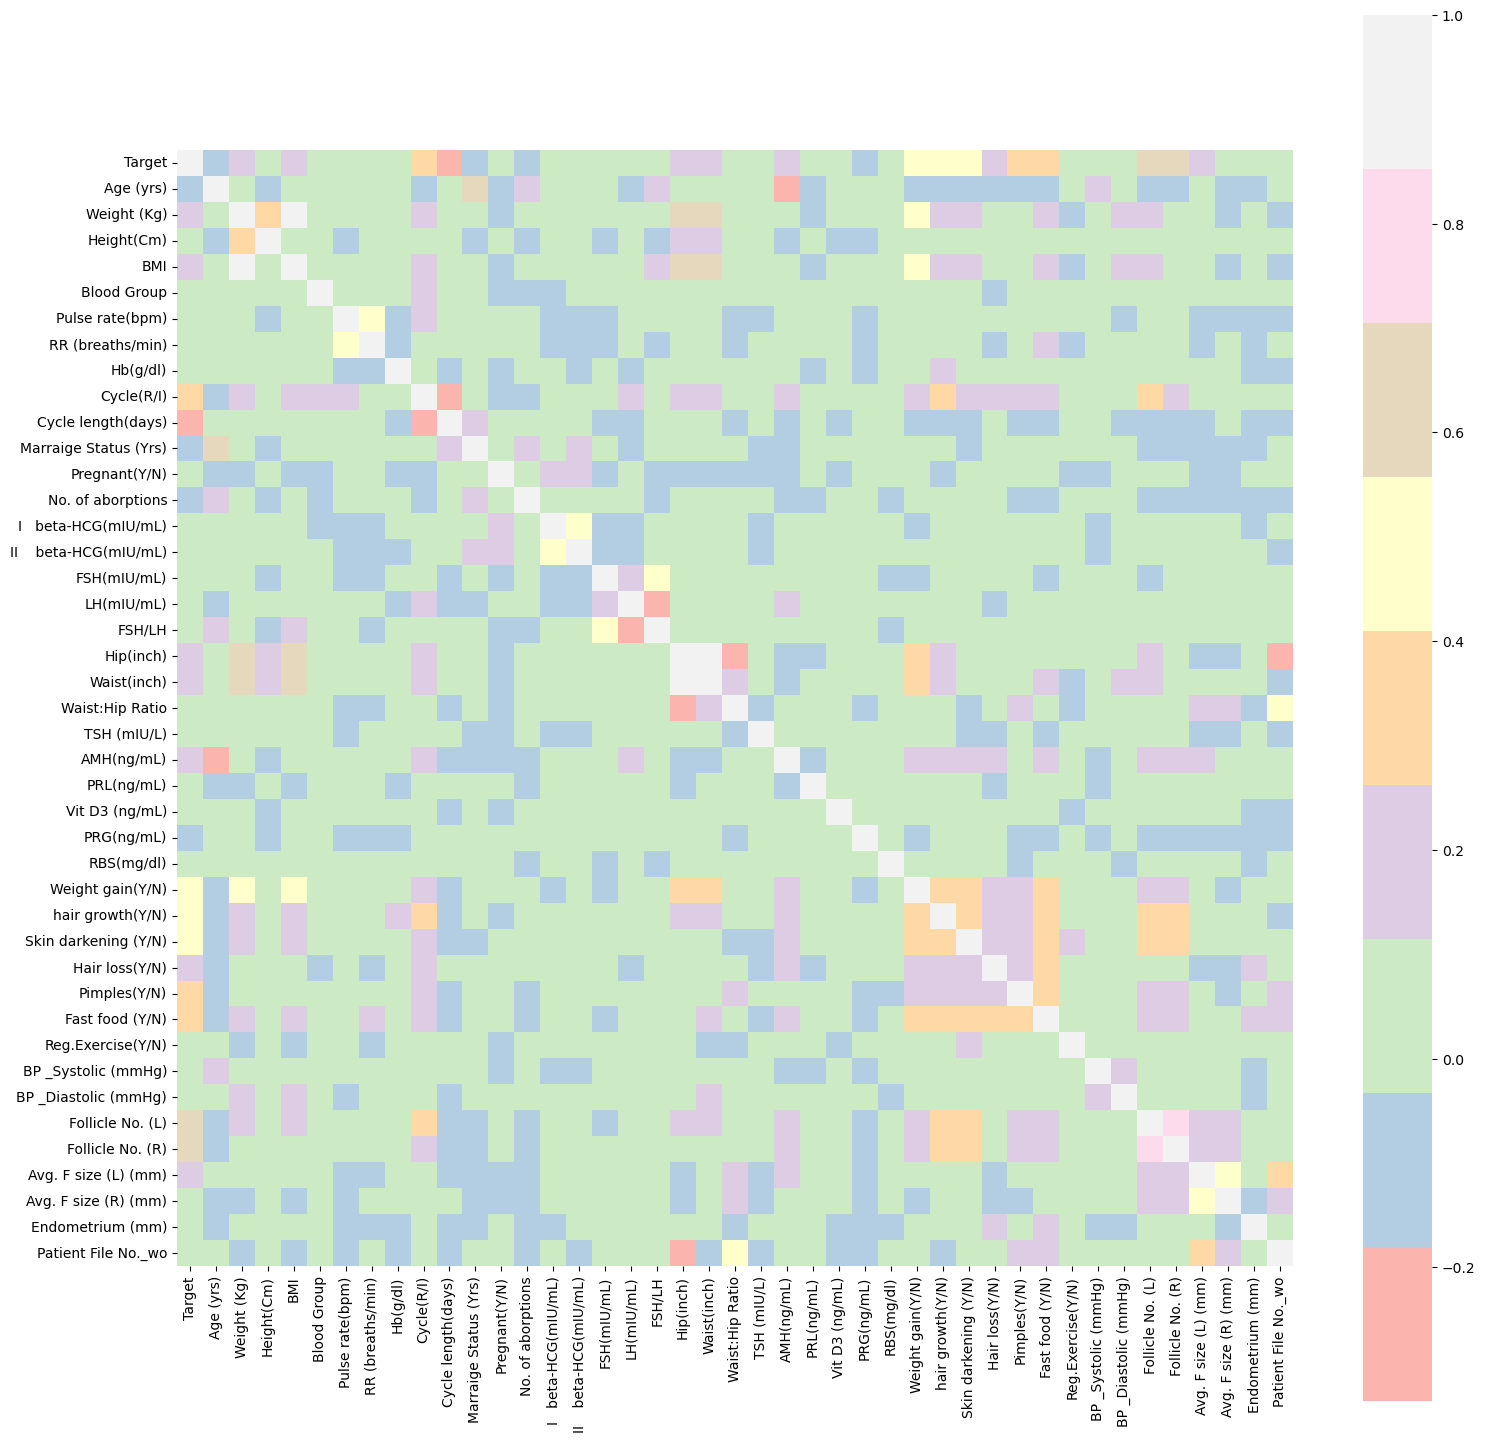

In [23]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);


In [24]:
#How all the features correlate with the PCOS 

corrmat["Target"].sort_values(ascending=False)

Target                    1.000000
Follicle No. (R)          0.650915
Follicle No. (L)          0.605305
Skin darkening (Y/N)      0.474561
hair growth(Y/N)          0.463557
Weight gain(Y/N)          0.445646
Cycle(R/I)                0.404082
Fast food (Y/N)           0.376877
Pimples(Y/N)              0.295313
AMH(ng/mL)                0.261105
Weight (Kg)               0.210241
BMI                       0.194121
Hair loss(Y/N)            0.176603
Hip(inch)                 0.163335
Waist(inch)               0.160226
Avg. F size (L) (mm)      0.124990
Pulse rate(bpm)           0.102988
LH(mIU/mL)                0.095426
Hb(g/dl)                  0.094481
Vit D3 (ng/mL)            0.086052
Endometrium (mm)          0.085608
Avg. F size (R) (mm)      0.084756
Height(Cm)                0.075431
Reg.Exercise(Y/N)         0.061816
Patient File No._wo       0.051936
FSH/LH                    0.043591
Blood Group               0.043032
RR (breaths/min)          0.039797
RBS(mg/dl)          

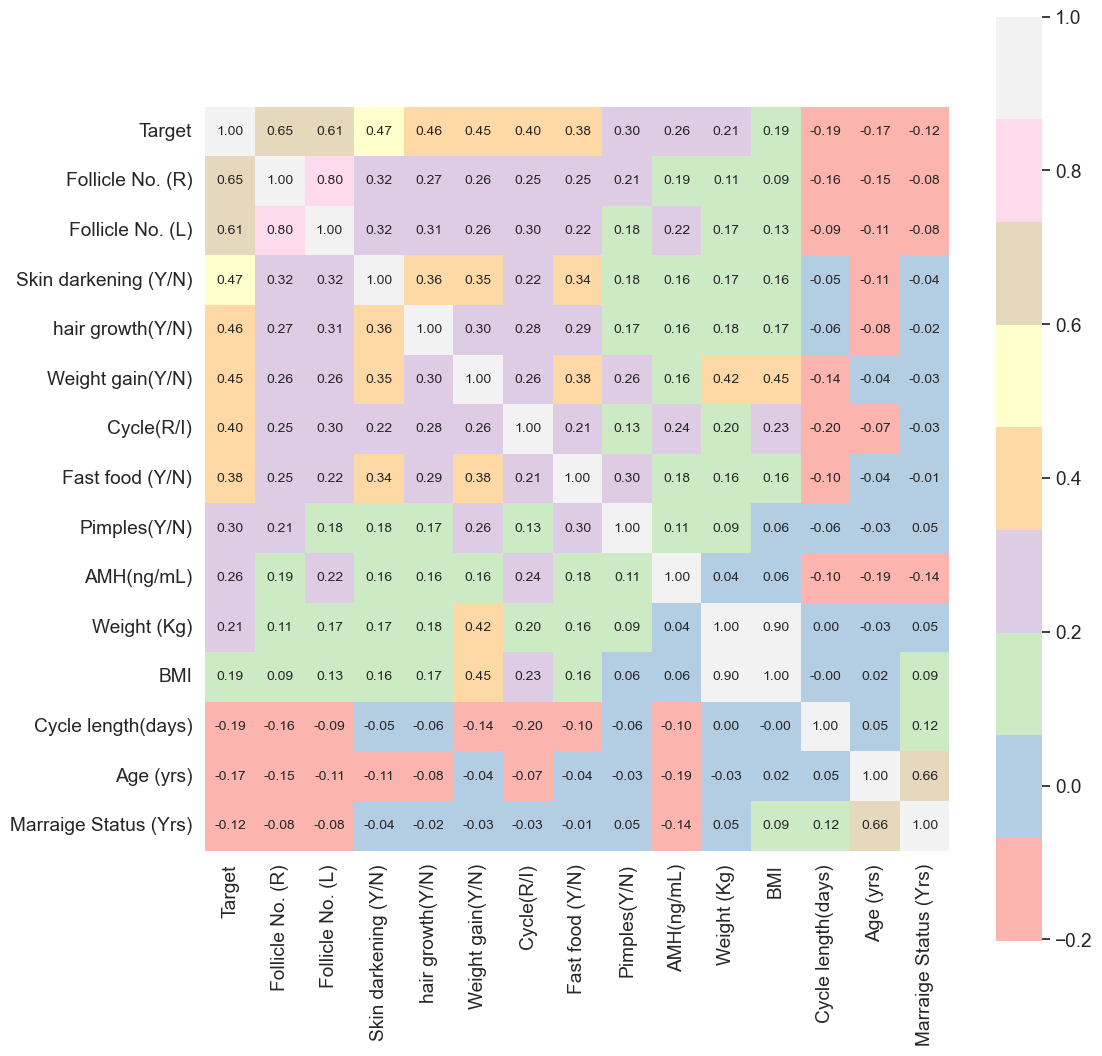

In [23]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "Target")["Target"].index 
cols_n = corrmat.nsmallest(l, "Target")["Target"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


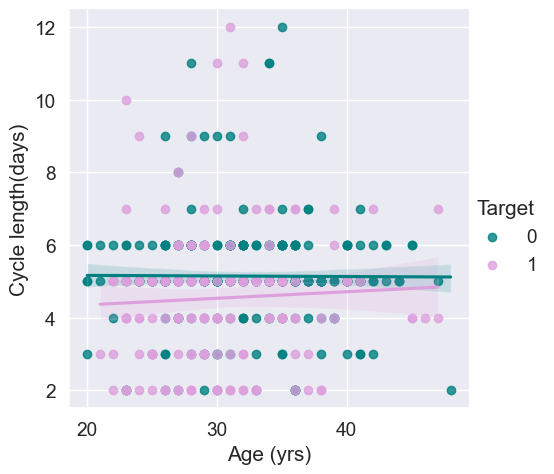

In [24]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=color)
plt.show(fig)


the length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

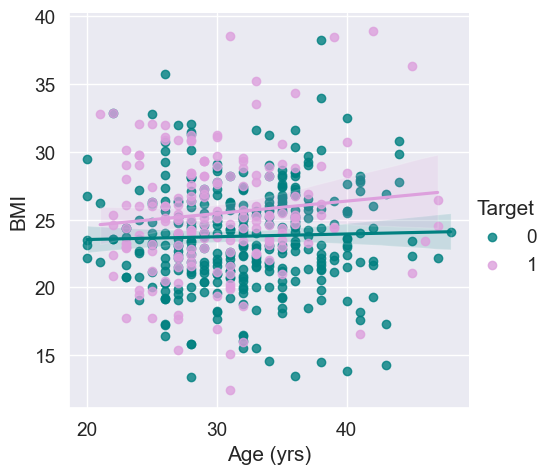

In [25]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= color )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

Patterns Of Irregularity In Mensuration

There is no clarity on what this feature and its values indicate but,

Apparently in the feature "Cycle(R/I)" value:

4 indicates irregular menstrual cycle

2 indicates a regular menstrual cycle

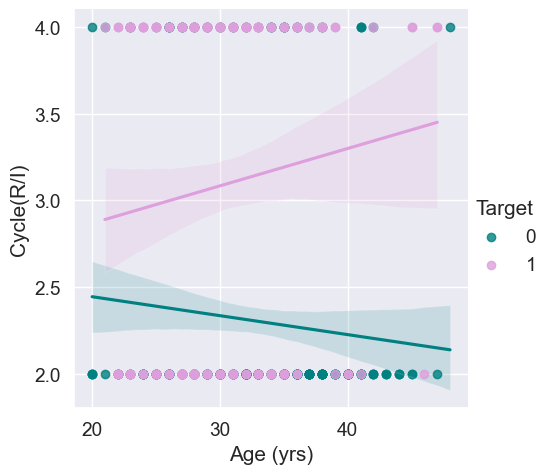

In [26]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=color)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

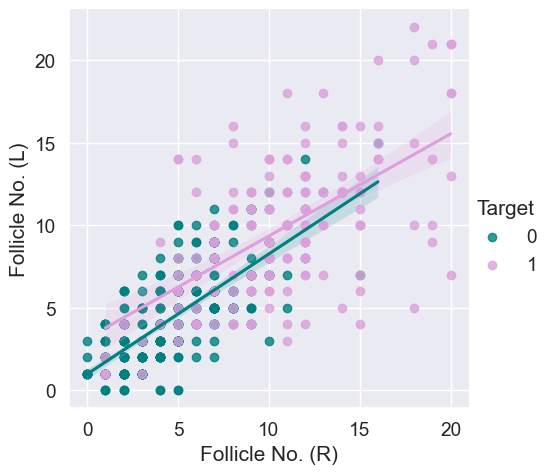

In [27]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=color)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. Thia is curious let's exlore it with boxen plot.

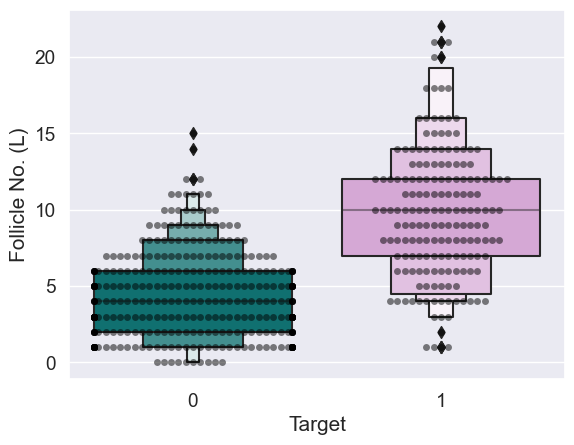

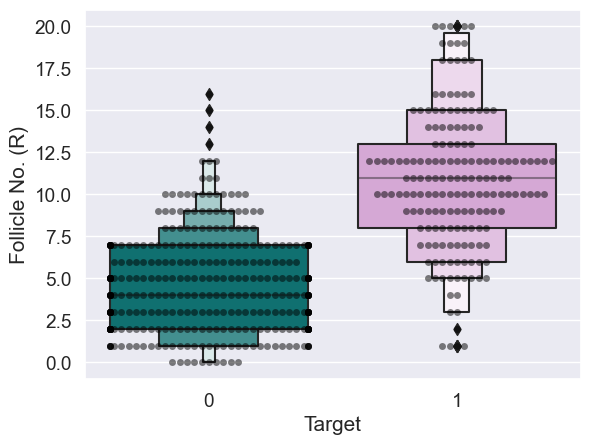

In [28]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()


The number of follicles in women with PCOS is higher, as expected. And are unequal as well

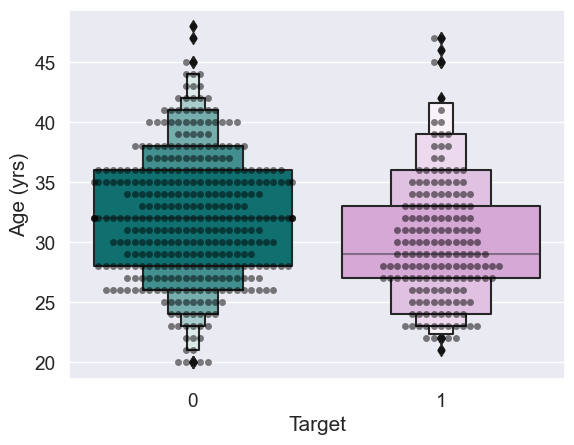

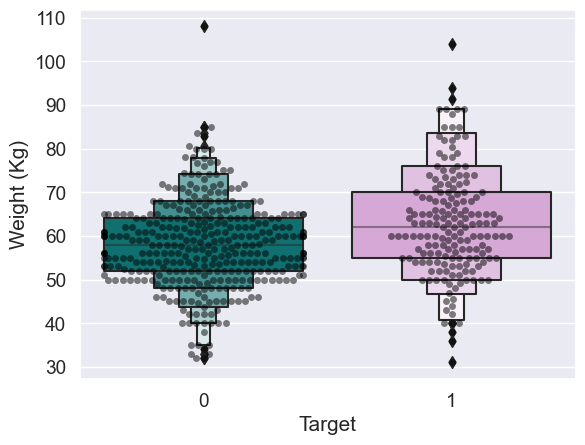

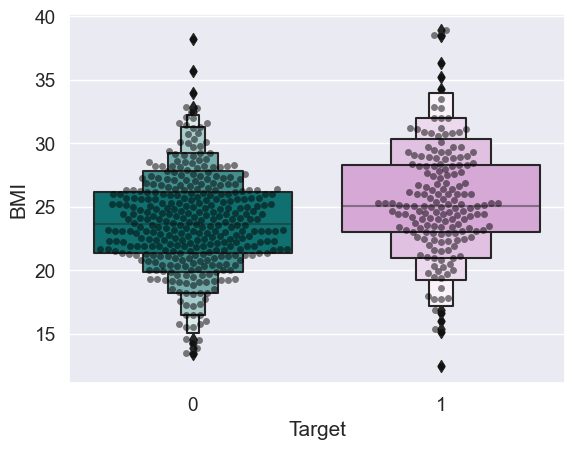

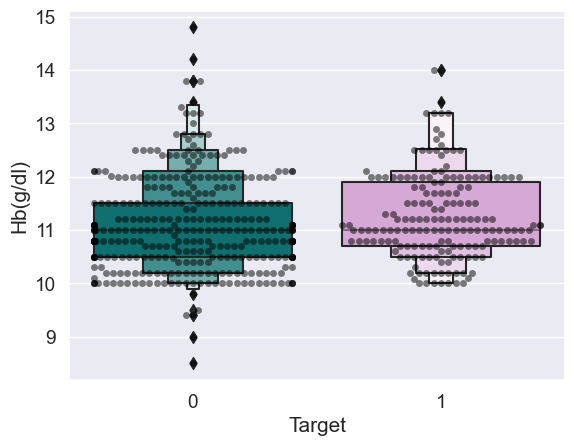

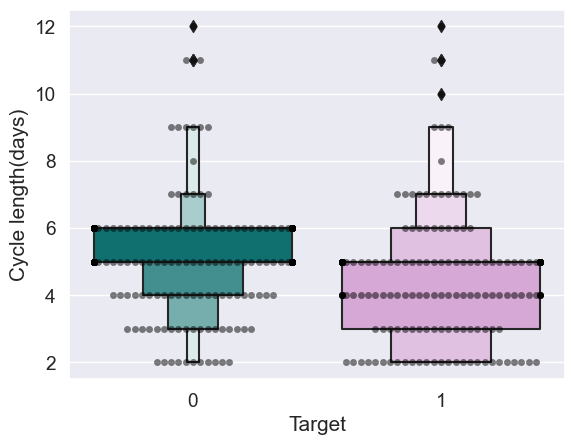

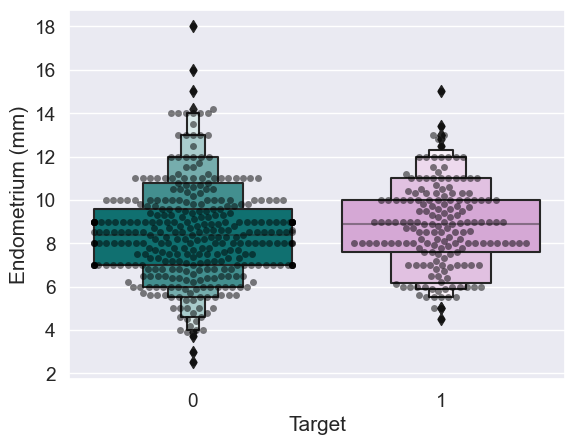

In [29]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

In [30]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in data.columns:
    if len(data[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

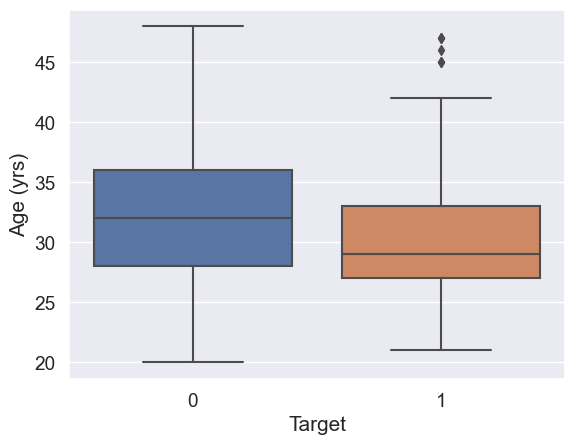

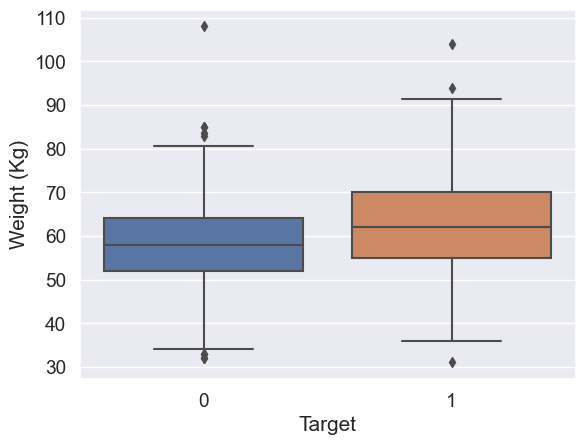

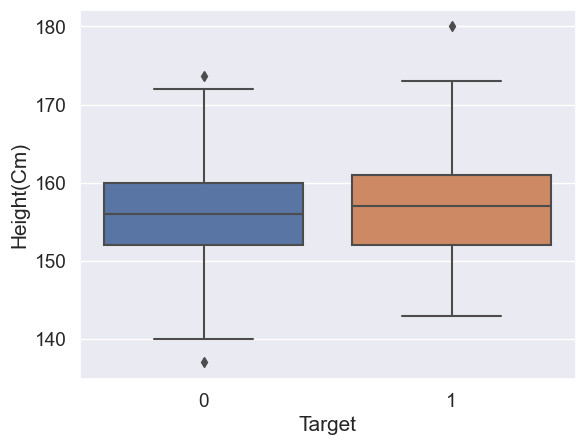

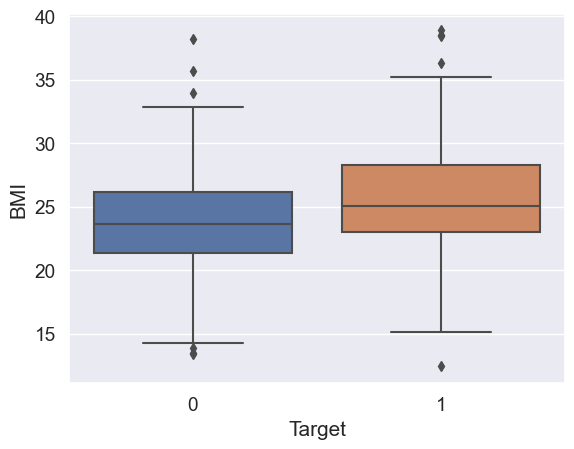

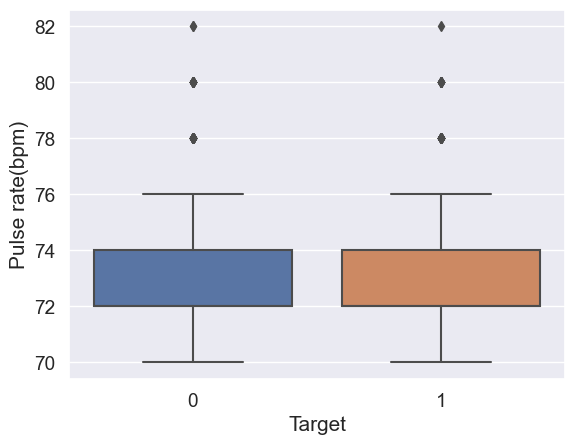

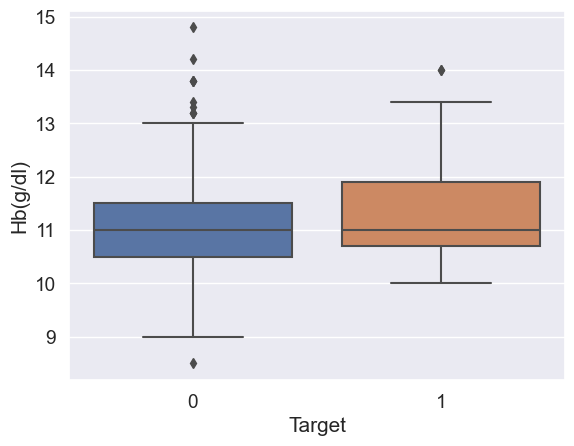

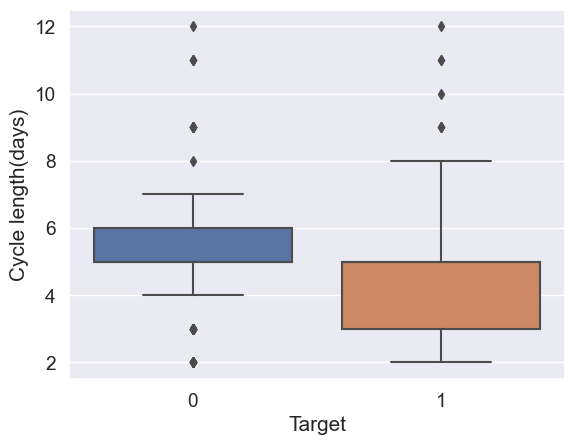

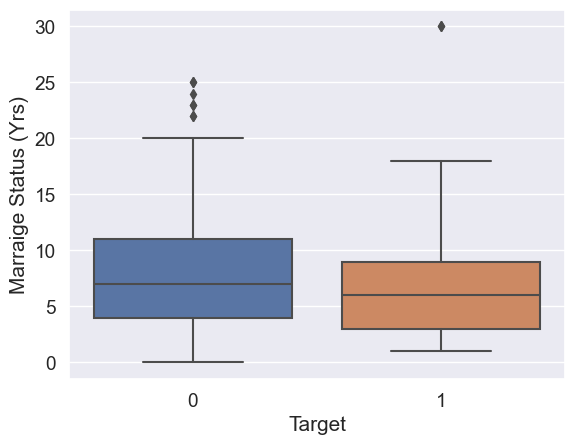

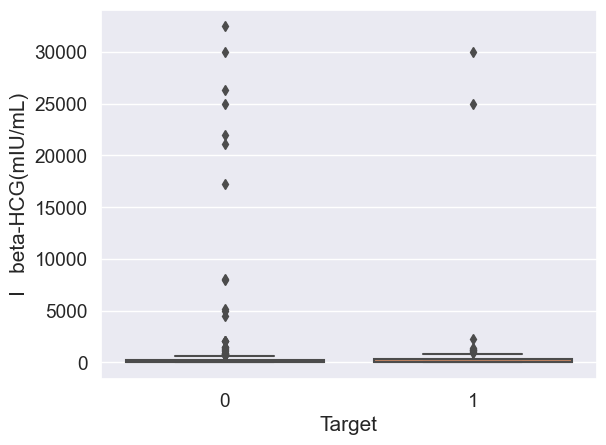

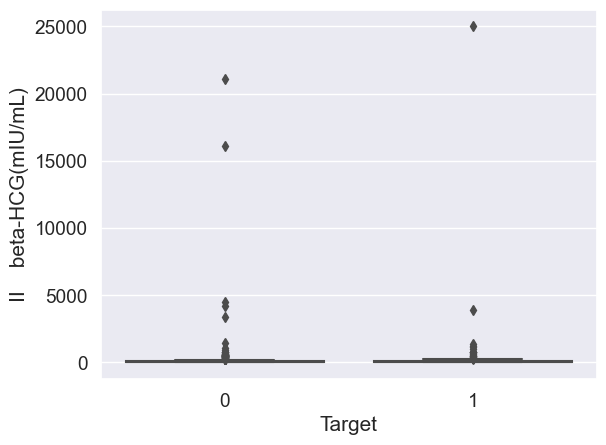

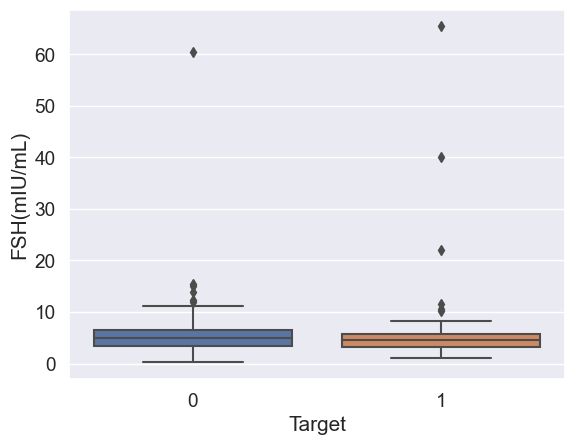

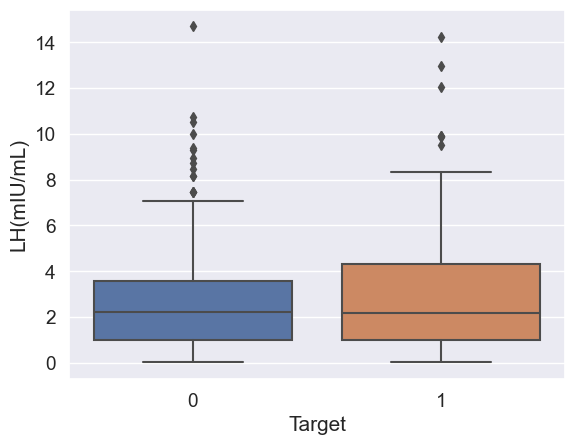

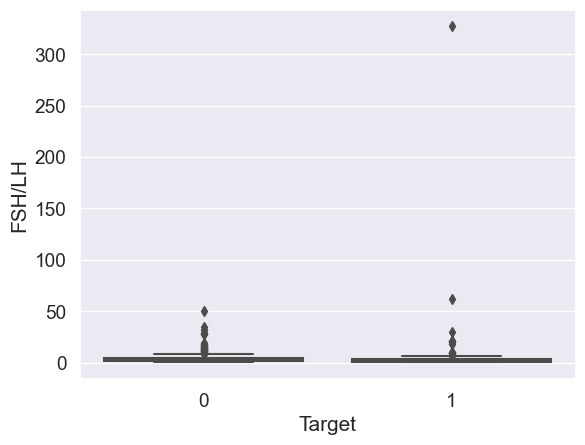

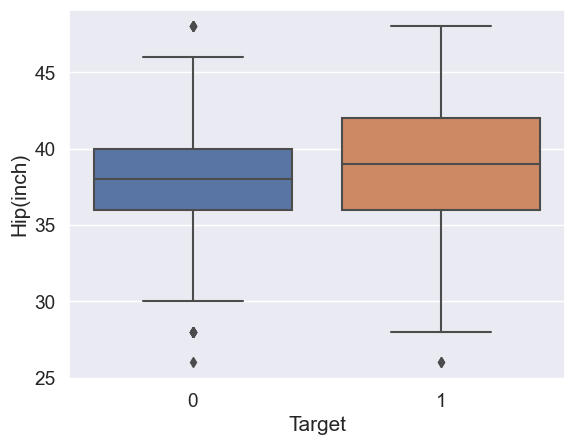

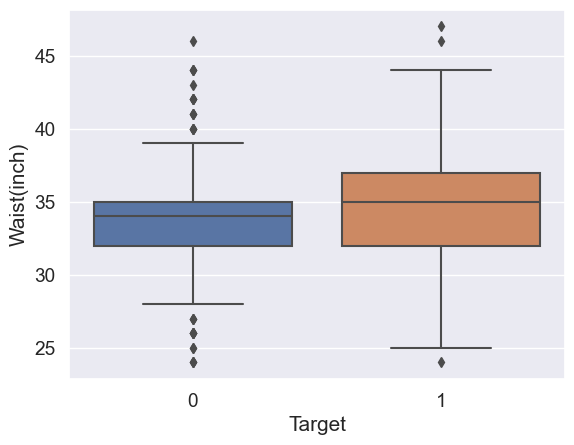

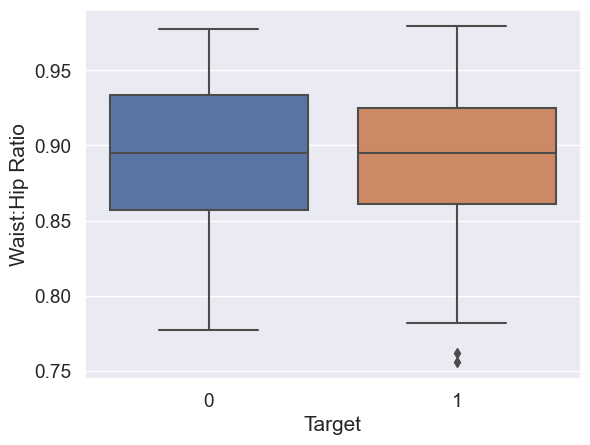

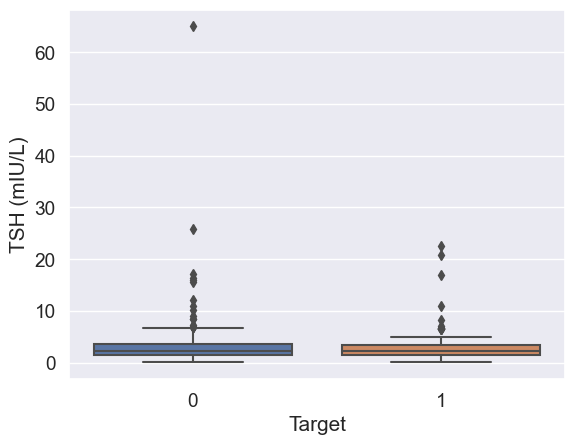

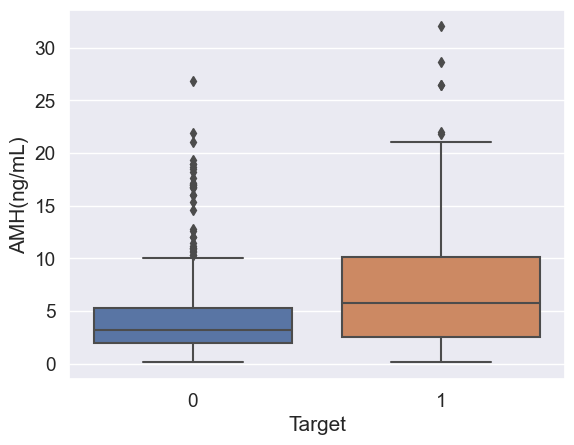

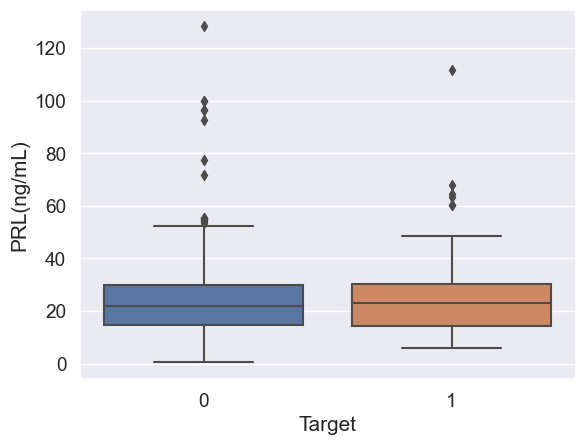

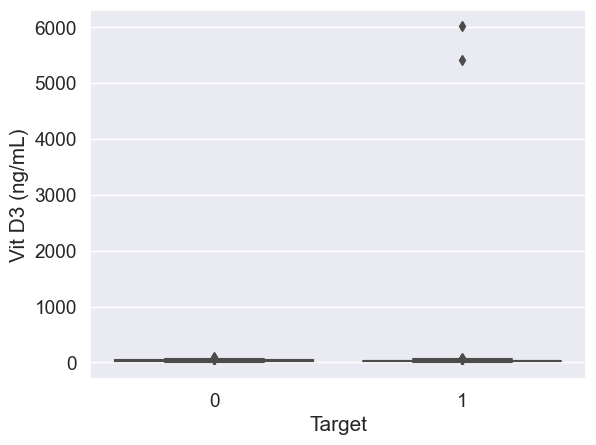

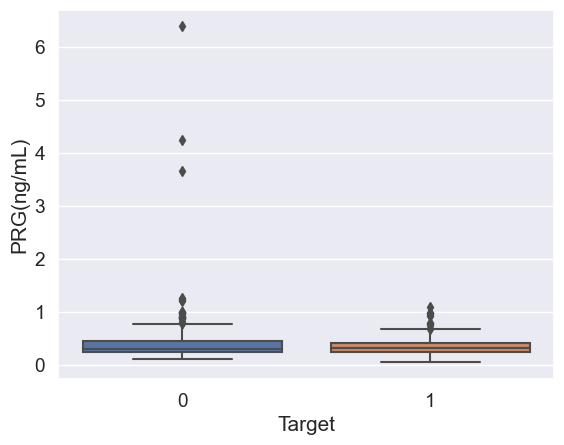

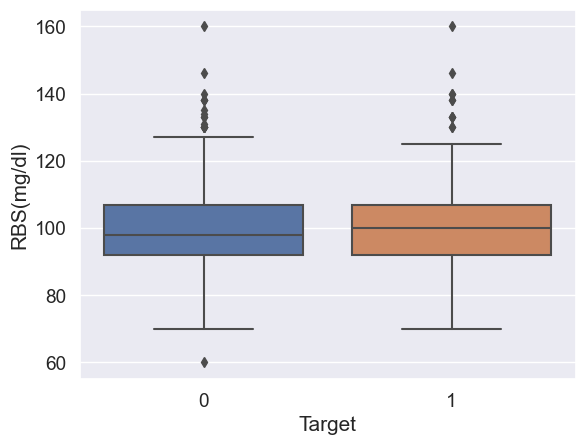

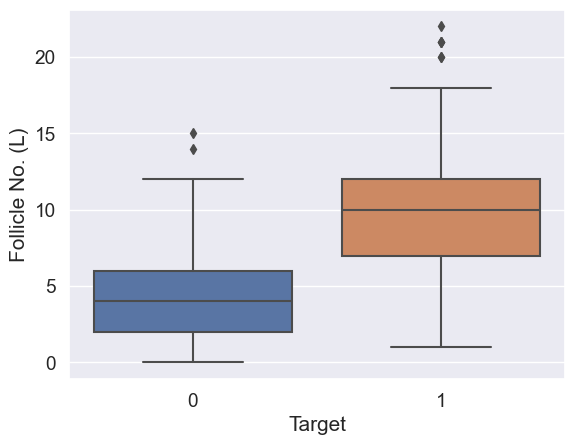

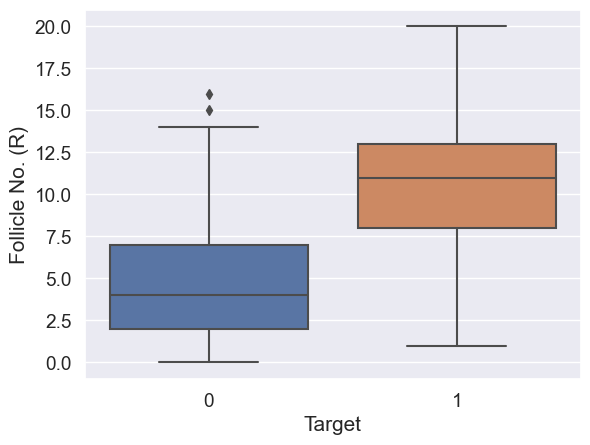

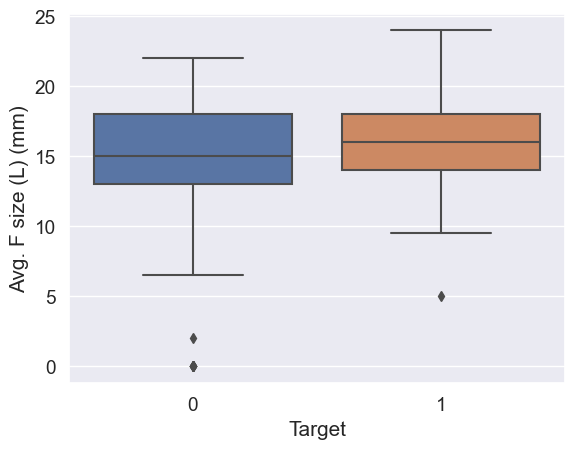

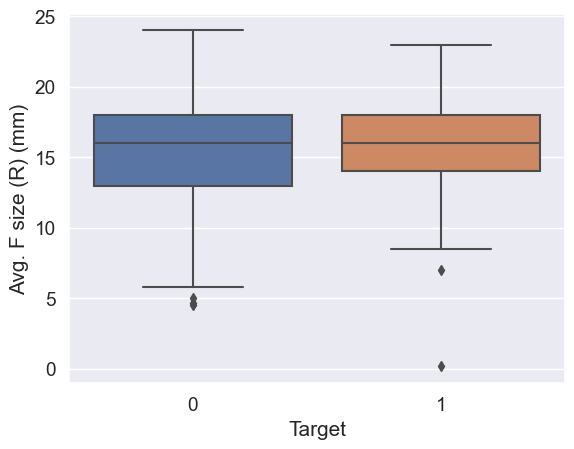

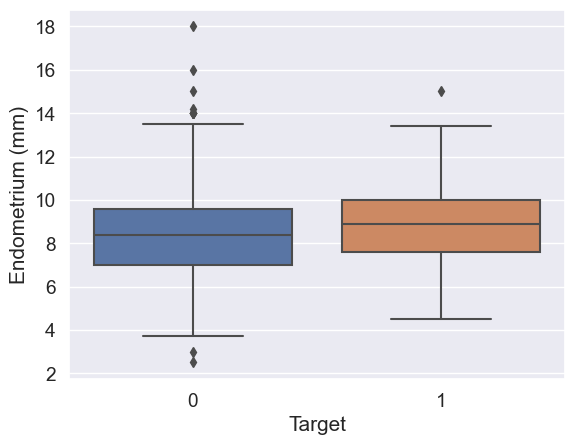

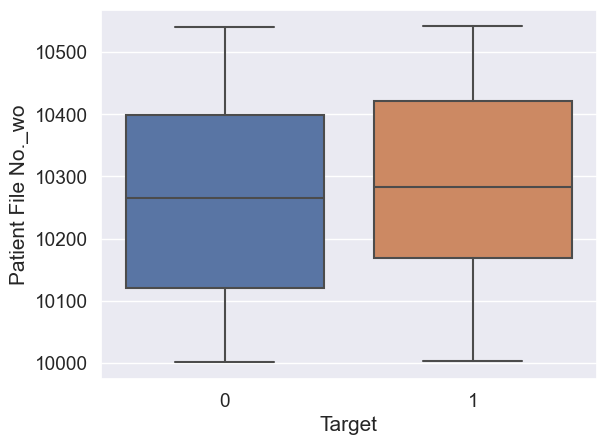

In [31]:
#Plotting Box plot for the numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="Target", data=data)
    plt.show()


Observations from boxplot

higher the follicle number more the tendancy of PCOS

patients with lower cycle lengths means more tendancy of PCOS

the average age of patients diagnosed with PCOS is 30 years

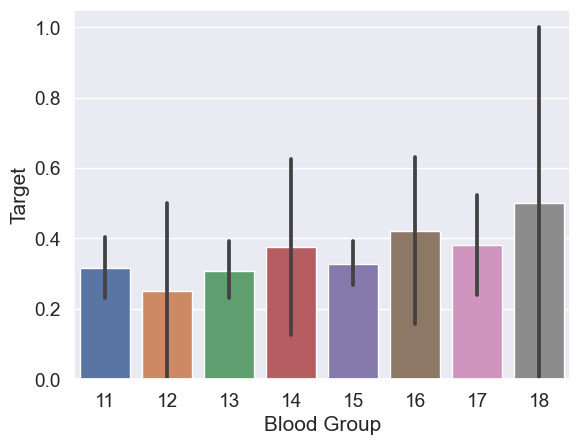

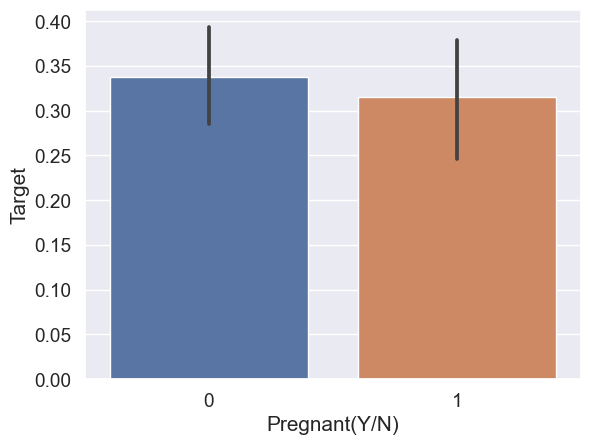

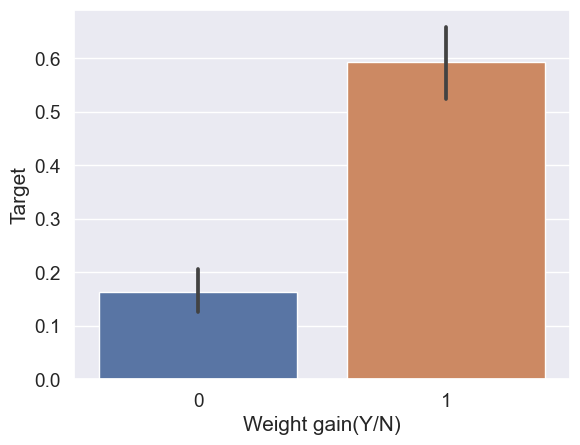

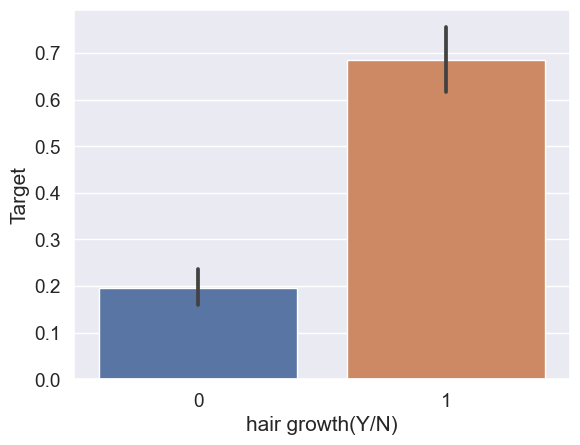

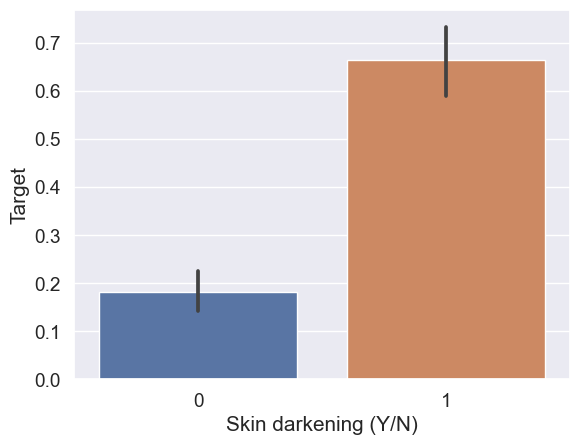

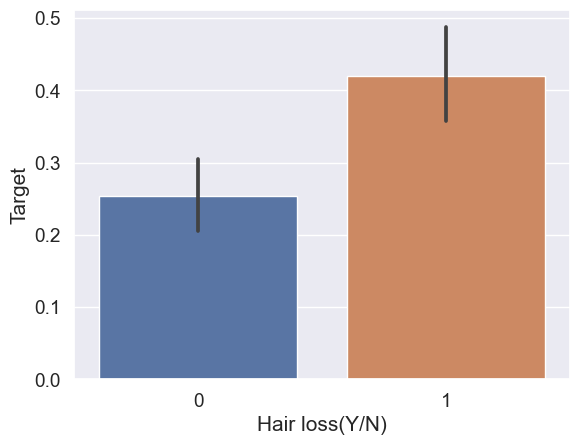

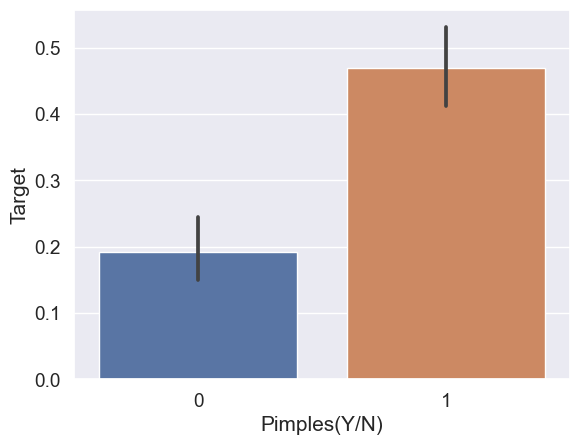

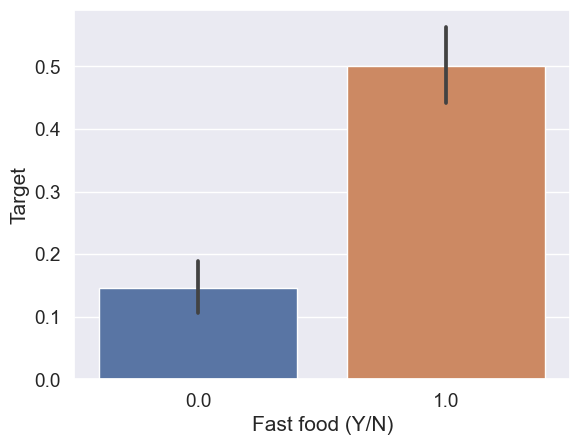

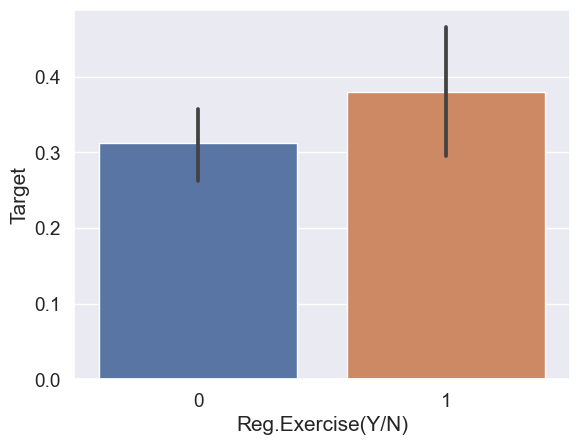

In [32]:
#Plotting barplot for categorical variables
for x in categorical_variables:
    if x != "Target":
        sns.barplot(x= x, y = "Target", data = data)
        plt.show()


Observations from barplot-

weight gain, hair growth, pipmles, hair loss, fast food and skin darkening means higher chances of PCOS.

So the above can also be termed as symptoms of PCOS

<Axes: xlabel='Target', ylabel='count'>

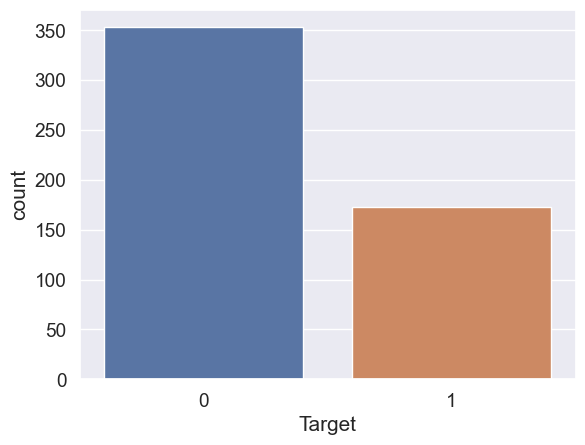

In [33]:
sns.countplot(x = "Target", data = data)

In [34]:
data["Target"].value_counts()

0    353
1    173
Name: Target, dtype: int64

## Model Building

In [25]:
#Assiging the features (X)and target(y)

X=data.drop(["Target"],axis = 1) #droping out index from features too
y=data["Target"]



### Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest, chi2


chi2_selector = SelectKBest(chi2, k=15) # Select top 10 features
X_kbest = chi2_selector.fit_transform(X, y)
selected_features = X.columns[chi2_selector.get_support()]


In [38]:
selected_features

Index(['Weight (Kg)', 'Cycle(R/I)', 'Marraige Status (Yrs)',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)'],
      dtype='object')

In [28]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X)
selected_features_lasso = X.columns[model.get_support()]


In [29]:
selected_features_lasso

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'Pulse rate(bpm)',
       'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Patient File No._wo'],
      dtype='object')

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 10 features
selected_features_tree = X.columns[indices]


In [36]:
selected_features_tree

Index(['TSH (mIU/L)', 'LH(mIU/mL)', 'Weight (Kg)', 'BMI', 'Cycle length(days)',
       'Patient File No._wo', 'FSH/LH', 'Fast food (Y/N)', 'Cycle(R/I)',
       'AMH(ng/mL)', 'Weight gain(Y/N)', 'Skin darkening (Y/N)',
       'hair growth(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)'],
      dtype='object')

In [39]:
X=data[selected_features]
y=data["Target"]

,Weight (Kg),Cycle(R/I),Marraige Status (Yrs),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,AMH(ng/mL),Vit D3 (ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
0,44.6,2,7.0,1.99,1.99,2.160326,2.07,17.1,0,0,0,0,1.0,3,3
1,65.0,2,11.0,60.80,1.99,6.174312,1.53,61.3,0,0,0,0,0.0,3,5
2,68.8,2,10.0,494.08,494.08,6.295455,6.63,49.7,0,0,0,1,1.0,13,15
3,65.0,2,4.0,1.99,1.99,3.415254,1.22,33.4,0,0,0,0,0.0,2,2
4,52.0,2,1.0,801.45,801.45,4.422222,2.26,43.8,0,0,0,0,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,50.0,2,8.0,1.99,1.99,5.558011,1.70,36.6,0,0,0,0,0.0,1,0
537,63.2,2,4.0,80.13,1.99,1.785211,5.60,23.0,1,0,0,0,0.0,9,7
538,54.0,2,8.0,1.99,1.99,4.302158,3.70,22.5,0,0,0,0,0.0,1,0
539,50.0,4,2.0,292.92,1.99,1.016166,5.20,22.4,0,0,0,1,0.0,7,6


In [60]:
X.columns

Index(['Weight (Kg)', 'Cycle(R/I)', 'Marraige Status (Yrs)',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH/LH',
       'AMH(ng/mL)', 'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)'],
      dtype='object')

In [64]:
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: Target, Length: 526, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 353, 1: 173})
Resampled dataset shape: Counter({0: 353, 1: 353})


In [41]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3) 

### CLASSIFICATION USING LINEAR MODELS

In [42]:
#CLASSIFICATION USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import classification_report

In [43]:
# Define the parameter grid
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize logistic regression model
log_reg = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)


In [44]:
# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 4.281332398719396}


In [45]:
# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       115
           1       0.85      0.90      0.87        97

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### CLASSIFICATION USING NON LINEAR MODELS

In [46]:
from sklearn.naive_bayes import GaussianNB
# Define the parameter grid
param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)
# Display the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'var_smoothing': 1e-09}


In [47]:
# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       115
           1       0.92      0.69      0.79        97

    accuracy                           0.83       212
   macro avg       0.85      0.82      0.82       212
weighted avg       0.85      0.83      0.83       212



In [48]:
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05, 0.1]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'gini', 'ccp_alpha': 0.01}


In [49]:
# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       115
           1       0.75      0.86      0.80        97

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.81      0.81      0.81       212



In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  RandomizedSearchCV
# Define the parameter grid
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'classifier__n_estimators': [int(x) for x in range(100, 1200, 100)],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__max_depth': [int(x) for x in range(10, 110, 10)],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create a pipeline with an imputer and a random forest classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

# Use RandomizedSearchCV to find the best parameters
random_search_rf= RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to training data
random_search_rf.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search_rf.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__n_estimators': 600, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 70, 'classifier__bootstrap': False}


In [71]:
# Make predictions on the test set
y_pred = random_search_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.89      0.93      0.91        97

    accuracy                           0.92       212
   macro avg       0.91      0.92      0.91       212
weighted avg       0.92      0.92      0.92       212



In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Define the parameter grid
param_dist = {
    'n_neighbors': np.arange(1, 31, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}


In [53]:
# Make predictions on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       115
           1       0.72      0.86      0.78        97

    accuracy                           0.78       212
   macro avg       0.78      0.78      0.78       212
weighted avg       0.79      0.78      0.78       212



In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# Initialize GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# Fit the model
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))






              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.89      0.88      0.88        97

    accuracy                           0.89       212
   macro avg       0.89      0.89      0.89       212
weighted avg       0.89      0.89      0.89       212



In [65]:
DATA = X+ y

In [72]:
import pickle

pickle.dump(DATA,open('DF.pkl','wb'))
pickle.dump(random_search_rf,open('PIPE.pkl','wb'))
            